# Applying Deep Learning to Predict CO2 Emissions in Canadan Vehicles

In [1]:
# LOADING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline

import os
# Hide Warnings
import warnings
warnings.filterwarnings('ignore')

#REFERENCE: https://www.kaggle.com/debajyotipodder/co2-emission-by-vehicles

In [2]:
# LOADING DATA
data = pd.read_csv('CO2 Emissions_Canada.csv')

In [16]:
data.head()

Make       Model        Class  E_Size  Transmission Cylinders Fuel_Type  \
0  ACURA         ILX      COMPACT     2.0             4       AS5         Z   
1  ACURA         ILX      COMPACT     2.4             4        M6         Z   
2  ACURA  ILX HYBRID      COMPACT     1.5             4       AV7         Z   
3  ACURA     MDX 4WD  SUV - SMALL     3.5             6       AS6         Z   
4  ACURA     RDX AWD  SUV - SMALL     3.5             6       AS6         Z   

   Fuel_City  Fuel_Hway  Fuel_KM  Fuel_MPG  CO2_Emissions  
0        9.9        6.7      8.5        33            196  
1       11.2        7.7      9.6        29            221  
2        6.0        5.8      5.9        48            136  
3       12.7        9.1     11.1        25            255  
4       12.1        8.7     10.6        27            244

In [9]:
data.shape

(7385, 12)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           7385 non-null   object 
 1   Model          7385 non-null   object 
 2   Class          7385 non-null   object 
 3   E_Size         7385 non-null   float64
 4   Transmission   7385 non-null   int64  
 5   Cylinders      7385 non-null   object 
 6   Fuel_Type      7385 non-null   object 
 7   Fuel_City      7385 non-null   float64
 8   Fuel_Hway      7385 non-null   float64
 9   Fuel_KM        7385 non-null   float64
 10  Fuel_MPG       7385 non-null   int64  
 11  CO2_Emissions  7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


In [23]:
data.skew(axis = 0, skipna = True)

E_Size           0.809181
Transmission     1.110415
Fuel_City        0.809005
Fuel_Hway        1.079217
Fuel_KM          0.893316
Fuel_MPG         0.977034
CO2_Emissions    0.526094
dtype: float64

### Data Exploration

In [3]:
data.describe()

Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000                          4.100000   
25%                           7.500000                          8.900000   
50%                           8.700000                         10.600000   
75%                          10.200000                         12.600000   
max                          20.600000                         26.100000   

       Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
count                  7385.000000          7385.000000  
mean                     27.481652           250.584699  
std                       7.231879            58.512679  
min                      11.000000            96.000000  
25%                      22.000000           208.000000  
50%                      27.000000           246.000000  
75%                      32.000000           288.000000  
max                      69.000000           522.000000

Renaming Variables

In [5]:

data.columns = ["Make", "Model", "Class", "E_Size","Transmission", "Cylinders", "Fuel_Type", "Fuel_City", "Fuel_Hway" , "Fuel_KM", 
                "Fuel_MPG", "CO2_Emissions"
]

In [6]:
data

Make        Model           Class  E_Size  Transmission Cylinders  \
0     ACURA          ILX         COMPACT     2.0             4       AS5   
1     ACURA          ILX         COMPACT     2.4             4        M6   
2     ACURA   ILX HYBRID         COMPACT     1.5             4       AV7   
3     ACURA      MDX 4WD     SUV - SMALL     3.5             6       AS6   
4     ACURA      RDX AWD     SUV - SMALL     3.5             6       AS6   
...     ...          ...             ...     ...           ...       ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL     2.0             4       AS8   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL     2.0             4       AS8   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL     2.0             4       AS8   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD     2.0             4       AS8   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD     2.0             4       AS8   

     Fuel_Type  Fuel_City  Fuel_Hway  Fuel_KM  Fuel_MPG  CO2_Emissions  
0            Z        9.9        6.7      8.5        33            196  
1            Z       11.2        7.7      9.6        29            221  
2            Z        6.0        5.8      5.9        48            136  
3            Z       12.7        9.1     11.1        25            255  
4            Z       12.1        8.7     10.6        27            244  
...        ...        ...        ...      ...       ...            ...  
7380         Z       10.7        7.7      9.4        30            219  
7381         Z       11.2        8.3      9.9        29            232  
7382         Z       11.7        8.6     10.3        27            240  
7383         Z       11.2        8.3      9.9        29            232  
7384         Z       12.2        8.7     10.7        26            248  

[7385 rows x 12 columns]

Data Profiling

In [7]:
# REQUIRES INSTALLATION
# pip install pandas_profiling
pp.ProfileReport(data)


##### <span style="color:red">Note: High correlations among Fuel features, the CO2 Emissions target variable also has high correlation with). </span>

## Numeric Feature Distributions

<AxesSubplot:xlabel='CO2_Emissions'>

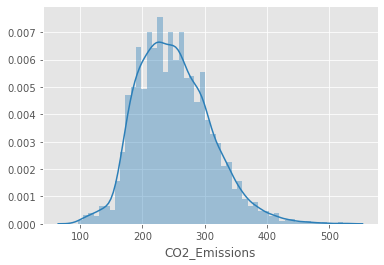

In [24]:
sns.distplot(data.CO2_Emissions, color="#2c7fb8")

<AxesSubplot:xlabel='Fuel_City'>

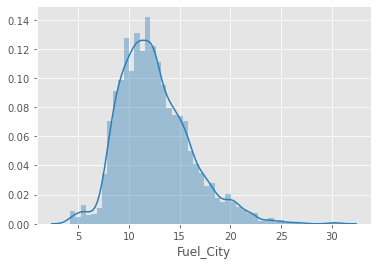

In [25]:
sns.distplot(data.Fuel_City, color="#2c7fb8")

<AxesSubplot:xlabel='Fuel_Hway'>

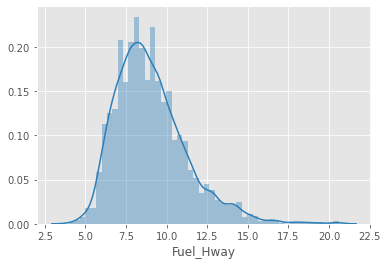

In [27]:
sns.distplot(data.Fuel_Hway, color="#2c7fb8")

<AxesSubplot:xlabel='Fuel_KM'>

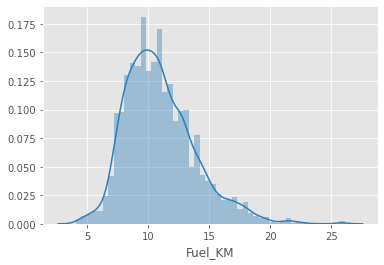

In [29]:
sns.distplot(data.Fuel_KM, color="#2c7fb8")

<AxesSubplot:xlabel='Fuel_MPG'>

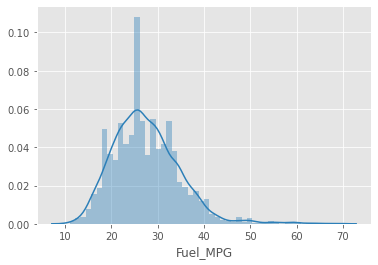

In [30]:
sns.distplot(data.Fuel_MPG, color="#2c7fb8")

<AxesSubplot:xlabel='E_Size'>

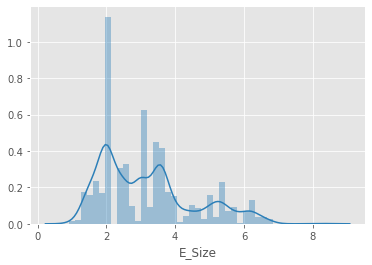

In [36]:
sns.distplot(data.E_Size, color="#2c7fb8")

<AxesSubplot:xlabel='Fuel_MPG'>

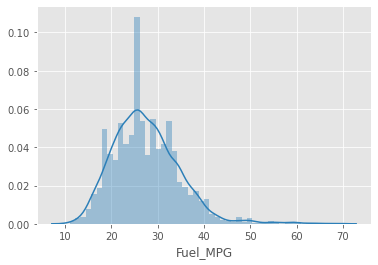

In [38]:
sns.distplot(data.Fuel_MPG, color="#2c7fb8")

### Categorical Feature Distribution

<AxesSubplot:>

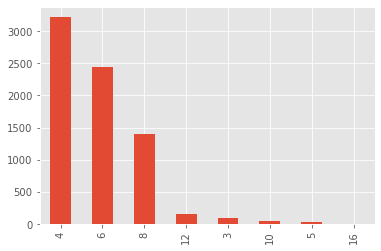

In [37]:
data['Transmission'].value_counts().head(10).plot.bar()

<AxesSubplot:>

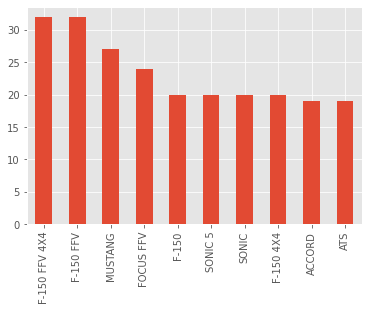

In [33]:
data['Model'].value_counts().head(10).plot.bar()

<AxesSubplot:>

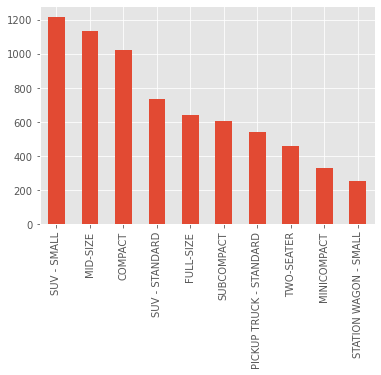

In [34]:
data['Class'].value_counts().head(10).plot.bar()

<AxesSubplot:>

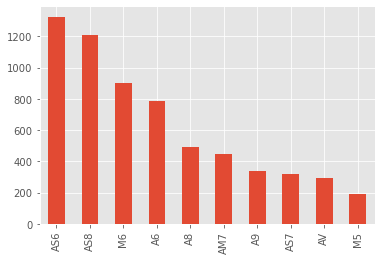

In [35]:
data['Cylinders'].value_counts().head(10).plot.bar()

<AxesSubplot:xlabel='CO2_Emissions', ylabel='Cylinders'>

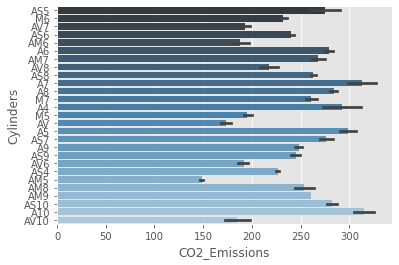

In [39]:
sns.barplot(x="CO2_Emissions", y="Cylinders", data=data, palette="Blues_d")

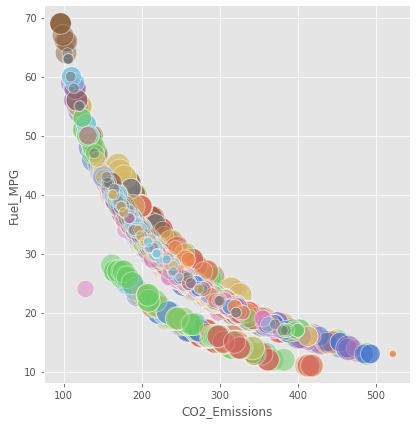

In [44]:
make = sns.relplot(x="CO2_Emissions", y="Fuel_MPG", hue="Make", size="Make",
            sizes=(50, 700), alpha=.5, palette="muted",
            height=6, data=data)

make._legend.remove()

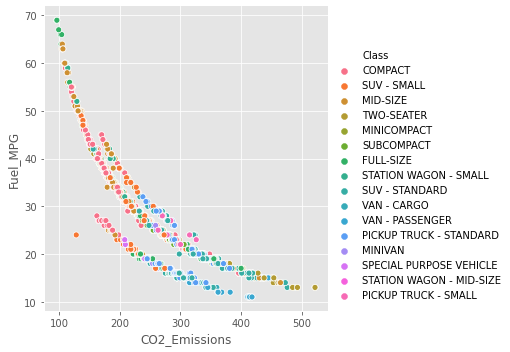

In [42]:
sns.relplot(x="CO2_Emissions", y="Fuel_MPG", hue="Class",sizes=(15, 200),  data=data);

# Findings: 

+ Certain numeric features show normal distribution while others are heavily skewed. 
+ For Categorical features, most of them have well-represented levels, transmission has 4,6 and 8 being the most represented levels. 
+ Might need to perform PCA to reduce dimensions after one-hot encoding.

## Correlations

In [46]:
corr_matrix = data.corr()
co2_em = corr_matrix['CO2_Emissions']
co2_em.iloc[co2_em.abs().argsort()]

Transmission     0.832644
E_Size           0.851145
Fuel_Hway        0.883536
Fuel_MPG        -0.907426
Fuel_KM          0.918052
Fuel_City        0.919592
CO2_Emissions    1.000000
Name: CO2_Emissions, dtype: float64

In [45]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

Finding: High multicorrelations between Fuel variables

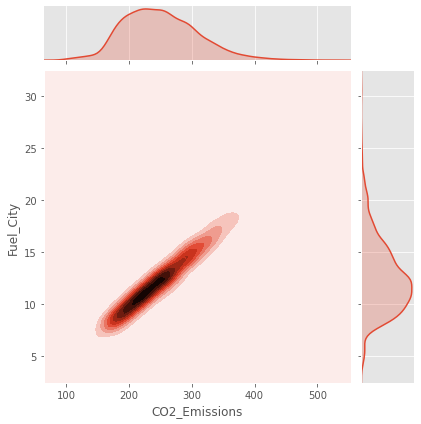

In [53]:
sns.jointplot(x='CO2_Emissions',y='Fuel_City',data=data,kind='kde')

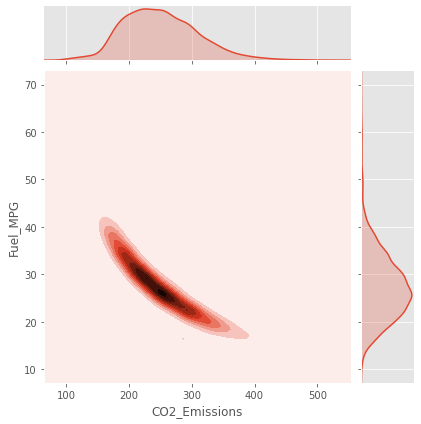

In [52]:
sns.jointplot(x='CO2_Emissions',y='Fuel_MPG',data=data,kind='kde')

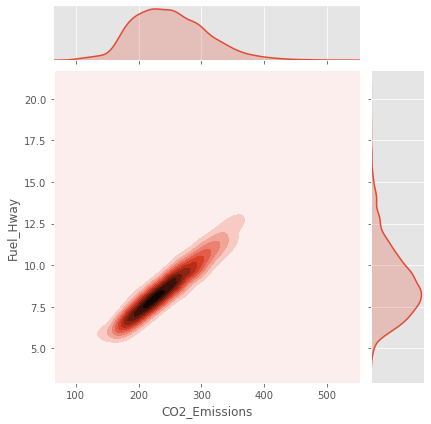

In [51]:
sns.jointplot(x='CO2_Emissions',y='Fuel_Hway',data=data,kind='kde')

## Data Preparation

As this is a regression model, all categorical features will be transformed to numerical representations via one-hot encoding.

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           7385 non-null   object 
 1   Model          7385 non-null   object 
 2   Class          7385 non-null   object 
 3   E_Size         7385 non-null   float64
 4   Transmission   7385 non-null   int64  
 5   Cylinders      7385 non-null   object 
 6   Fuel_Type      7385 non-null   object 
 7   Fuel_City      7385 non-null   float64
 8   Fuel_Hway      7385 non-null   float64
 9   Fuel_KM        7385 non-null   float64
 10  Fuel_MPG       7385 non-null   int64  
 11  CO2_Emissions  7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


### One-Hot Encoding Multiple Categorical Features

If a single column has more than 500 categories, the aforementioned way of one-hot encoding is not a good approach. In this case, we can do one-hot encoding for the top 10 or 20 categories that are occurring most for a particular column. A sample code is shown below:



In [68]:
categorical_cols = ['Make', 'Model', 'Cylinders', 'Fuel_Type','Class'] 

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

transformed_data = onehotencoder.fit_transform(data[categorical_cols])

# the above transformed_data is an array so convert it to dataframe
encoded_data = pd.DataFrame(transformed_data, index=data.index)

# now concatenate the original data and the encoded data using pandas
data_ohe = pd.concat([data, encoded_data], axis=1)

In [69]:
data_ohe

Make  Model  Class  E_Size  Transmission  Cylinders  Fuel_Type  \
0        0   1057      0     2.0             4         14          4   
1        0   1057      0     2.4             4         25          4   
2        0   1058      0     1.5             4         22          4   
3        0   1233     11     3.5             6         15          4   
4        0   1499     11     3.5             6         15          4   
...    ...    ...    ...     ...           ...        ...        ...   
7380    41   1951     11     2.0             4         17          4   
7381    41   1957     11     2.0             4         17          4   
7382    41   1960     11     2.0             4         17          4   
7383    41   1968     12     2.0             4         17          4   
7384    41   1969     12     2.0             4         17          4   

      Fuel_City  Fuel_Hway  Fuel_KM  Fuel_MPG  CO2_Emissions  \
0           9.9        6.7      8.5        33            196   
1          11.2        7.7      9.6        29            221   
2           6.0        5.8      5.9        48            136   
3          12.7        9.1     11.1        25            255   
4          12.1        8.7     10.6        27            244   
...         ...        ...      ...       ...            ...   
7380       10.7        7.7      9.4        30            219   
7381       11.2        8.3      9.9        29            232   
7382       11.7        8.6     10.3        27            240   
7383       11.2        8.3      9.9        29            232   
7384       12.2        8.7     10.7        26            248   

                                                      0  
0       (0, 0)\t1.0\n  (0, 1099)\t1.0\n  (0, 2109)\t...  
1       (0, 0)\t1.0\n  (0, 1099)\t1.0\n  (0, 2120)\t...  
2       (0, 0)\t1.0\n  (0, 1100)\t1.0\n  (0, 2117)\t...  
3       (0, 0)\t1.0\n  (0, 1275)\t1.0\n  (0, 2110)\t...  
4       (0, 0)\t1.0\n  (0, 1541)\t1.0\n  (0, 2110)\t...  
...                                                 ...  
7380    (0, 41)\t1.0\n  (0, 1993)\t1.0\n  (0, 2112)\...  
7381    (0, 41)\t1.0\n  (0, 1999)\t1.0\n  (0, 2112)\...  
7382    (0, 41)\t1.0\n  (0, 2002)\t1.0\n  (0, 2112)\...  
7383    (0, 41)\t1.0\n  (0, 2010)\t1.0\n  (0, 2112)\...  
7384    (0, 41)\t1.0\n  (0, 2011)\t1.0\n  (0, 2112)\...  

[7385 rows x 13 columns]

In [65]:
data_out

0  E_Size  Transmission  \
0       (0, 0)\t1.0\n  (0, 1099)\t1.0\n  (0, 2109)\t...     2.0             4   
1       (0, 0)\t1.0\n  (0, 1099)\t1.0\n  (0, 2120)\t...     2.4             4   
2       (0, 0)\t1.0\n  (0, 1100)\t1.0\n  (0, 2117)\t...     1.5             4   
3       (0, 0)\t1.0\n  (0, 1275)\t1.0\n  (0, 2110)\t...     3.5             6   
4       (0, 0)\t1.0\n  (0, 1541)\t1.0\n  (0, 2110)\t...     3.5             6   
...                                                 ...     ...           ...   
7380    (0, 41)\t1.0\n  (0, 1993)\t1.0\n  (0, 2112)\...     2.0             4   
7381    (0, 41)\t1.0\n  (0, 1999)\t1.0\n  (0, 2112)\...     2.0             4   
7382    (0, 41)\t1.0\n  (0, 2002)\t1.0\n  (0, 2112)\...     2.0             4   
7383    (0, 41)\t1.0\n  (0, 2010)\t1.0\n  (0, 2112)\...     2.0             4   
7384    (0, 41)\t1.0\n  (0, 2011)\t1.0\n  (0, 2112)\...     2.0             4   

      Fuel_City  Fuel_Hway  Fuel_KM  Fuel_MPG  CO2_Emissions  
0           9.9        6.7      8.5        33            196  
1          11.2        7.7      9.6        29            221  
2           6.0        5.8      5.9        48            136  
3          12.7        9.1     11.1        25            255  
4          12.1        8.7     10.6        27            244  
...         ...        ...      ...       ...            ...  
7380       10.7        7.7      9.4        30            219  
7381       11.2        8.3      9.9        29            232  
7382       11.7        8.6     10.3        27            240  
7383       11.2        8.3      9.9        29            232  
7384       12.2        8.7     10.7        26            248  

[7385 rows x 8 columns]